#                                      Bank Churn Analysis

In [ ]:
#importing the necessary libraries to carry out analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Loading The dataset for the storage
df = pd.read_csv('D:/Bank-Customer-Attrition-Insights-Data.csv')

 ##                                                       Basic Data Exploration

In [4]:
#to get top 5 values
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
#to get last 5 values from the dataset
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15710408,Cunningham,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [9]:
#to get the shape or order of the dataset(number of rows, number of columns)
df.shape

(10000, 18)

In [11]:
#to display the basic information about the various columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [13]:
#to find the missing values in the dataset
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

*There are no missing values in the dataset*

In [15]:
#to get the information about the duplicate values present in the dataset
df.duplicated().sum()

0

*There are no duplicate values in the dataset*

In [31]:
#converting the various columns into string data type(1 for yes, 0 for no)  
df['HasCrCard'] = df['HasCrCard'].replace({1: 'yes', 0: 'no'})

df['Exited'] = df['Exited'].replace({1: 'yes', 0: 'no'})     

df['Complain'] = df['Complain'].replace({1: 'yes', 0: 'no'})

df['IsActiveMember'] = df['IsActiveMember'].replace({1: 'yes', 0: 'no'})

## Analysing The Percentage of Customer That Exited or Churn Out

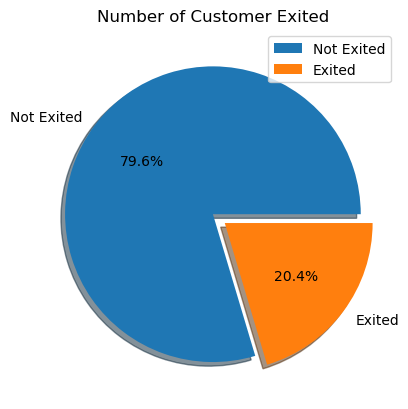

In [59]:
#counting the various values in the Exited Column where 'yes' indicates that customer has churned out and 'no' means that our he/she is still our customer
gc = df['Exited'].value_counts()

#creating a pie chart to represent of customer churned out
explode = [0,0.1]
plt.pie(gc,labels=['Not Exited','Exited'],explode = explode, shadow = True,autopct='%1.1f%%')
plt.legend()#to get the legend in our graph
plt.title("Number of Customer Exited");#to get a title for the pie chart drawned below

*Total 20.4% of Customers have Churned out or Exited, While Bank has retained it's 79.6% of Customers*

## Analysing The Reason for Customer Churning Out Based on varous Parameters

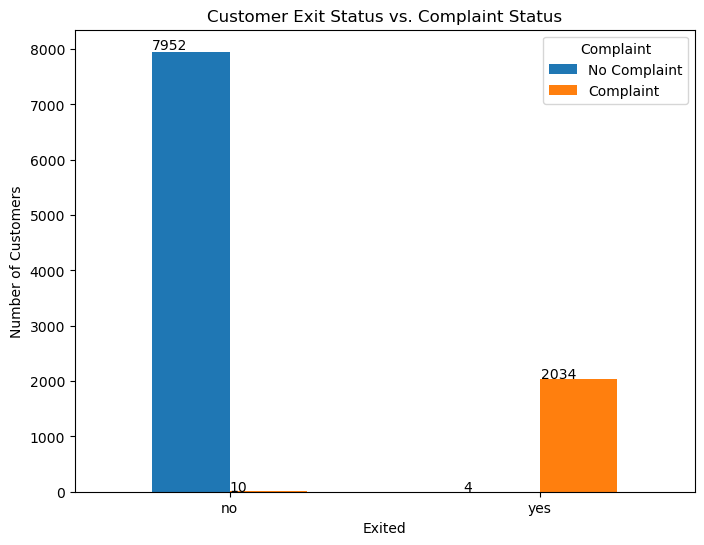

In [39]:
 # Group data by 'Exited' and 'Complain' and count occurrences
grouped_data = df.groupby(['Exited', 'Complain']).size().unstack()

# Create the bar plot
ax = grouped_data.plot(kind='bar', figsize=(8, 6), rot=0)
plt.title('Customer Exit Status vs. Complaint Status')
plt.xlabel('Exited') #labelling x-axis
plt.ylabel('Number of Customers')#labelling y-axis
plt.legend(title='Complaint', labels=['No Complaint', 'Complaint']) #creating legend for the graph

    # Add data labels on top of bars (Optional but improves readability)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005)) #Adjusted offset for better positioning

*We can observe that most of the customers that complained have exited or churned out(2034), only 4 customers have and complain but didn,t churned out. Complain have a high possiblity that the customer can leave the bank.*

In [136]:
#Creating a new column named "Age Group" for analysis purpose
df['Age Group'] = ""
for i, age in enumerate(df['Age']):
    if age <= 25:
        df.at[i, 'Age Group'] = '18 to 25'
    elif 25 < age <= 35:
        df.at[i, 'Age Group'] = '26 to 35'
    elif 35 < age <= 45:
        df.at[i, 'Age Group'] = '36 to 45'    
    elif 45 < age <= 65:
        df.at[i, 'Age Group'] = '46 to 65'
    else:
        df.at[i, 'Age Group'] = '65 above'

#to check whether the changes took place or not
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,yes,yes,101348.88,yes,yes,2,DIAMOND,464,36 to 45
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,no,yes,112542.58,no,yes,3,DIAMOND,456,36 to 45
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,yes,no,113931.57,yes,yes,3,DIAMOND,377,36 to 45
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,no,no,93826.63,no,no,5,GOLD,350,36 to 45
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,yes,yes,79084.10,no,no,5,GOLD,425,36 to 45


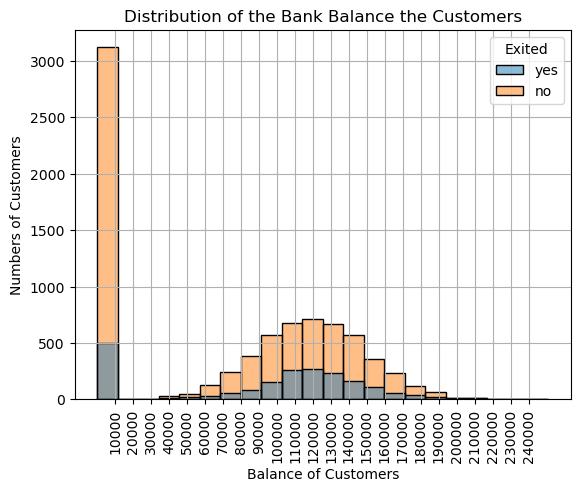

In [64]:
#Drawing histogram for the distribution of Bank Balance of the Customer who churn out to identify any possible pattern
sns.histplot(x='Balance', data= df, hue= "Exited", kde =False)#to create the histogram
plt.xticks(np.arange(10000,250000,10000),rotation=90)#setting x-axis
plt.xlabel("Balance of Customers")#labelling x-axis
plt.ylabel("Numbers of Customers")#labelling y-axis
plt.title('Distribution of the Bank Balance the Customers');#asigning the title to the graph
plt.grid();#applying grids for better visualization

*Distribution of the Bank Balance of the customer churned out follows a Normal Distribution which indicates that there is no extreme balance biasness in the data and it depends upon other factors at play.*

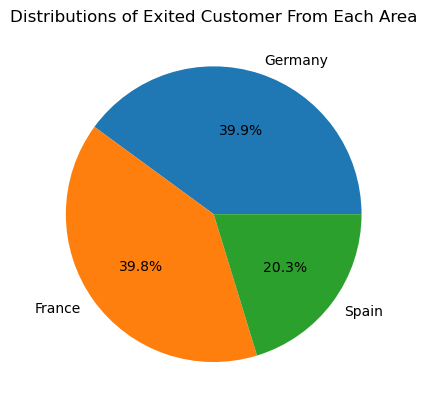

In [67]:
#Creating a pie chart for representation of customers churned out based on their Geographical location 

#creating a separate list for locations/areas where customer churned out 
g= []
for i,j in zip(df['Exited'],df['Geography']):
    if i == 'yes':
       g.append(j)
        
g = pd.DataFrame(g)  

gc = g.value_counts()#counting the various values in the create data frame where 'yes' indicates that customer has churned out and 'no' means that our he/she is still our customer
plt.pie(gc,labels=['Germany','France','Spain'],autopct='%1.1f%%')#to create a pie chart for desire purpose
plt.title("Distributions of Exited Customer From Each Area");#code to get dedicated title for graph

*Maximum Customers have Churned out from Germany and France(nearly equal) and least from Spain. There might be some problem with the bank’s services, fees, or offerings in Germany and France because of which many customers are churning out.* 

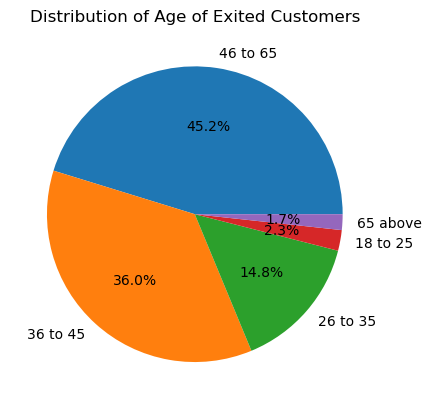

In [49]:
#creating a separate list for Age Group of customer that churned out 
g= []
for i,j in zip(df['Exited'],df['Age Group']):
    if i == 'yes':
       g.append(j)
        
g = pd.DataFrame(g) 

gc = g.value_counts()#counting frequencies of different values in the above created data frame
plt.pie(gc,labels=['46 to 65', '36 to 45', '26 to 35', '18 to 25', '65 above'],autopct='%1.1f%%')#to create a pie chart for desire purpose
plt.title("Distribution of Age of Exited Customers");#code to get dedicated title for graph

*Most of the Customer that churned out were from 46 to 65 years of age then 36 to 45 and so on. Least were from 65 and above due to the fact that older customers are less likely to churn because they tend to be more established with their financial institutions and may have a greater sense of loyalty toward the bank.*

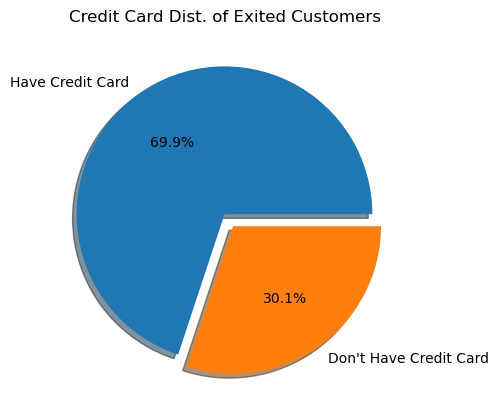

In [61]:
#creating a separate list for Age Group of customer that churned out 
g= []
for i,j in zip(df['Exited'],df['HasCrCard']):
    if i == 'yes':
       g.append(j)
        
g = pd.DataFrame(g) 

gc = g.value_counts()#counting frequencies of customer using credit card in the above created data frame


plt.pie(gc,labels=['Have Credit Card',"Don't Have Credit Card"],explode = explode, shadow = True,autopct='%1.1f%%')#creatin pie chart for the percentage of customer using credit card
plt.title("Credit Card Dist. of Exited Customers");#to get the desire title for the pie chart

*Customer who churned out or exited the bank, out of those 69.9% were using Credit Card which contributes to the profitiblity of bank.*

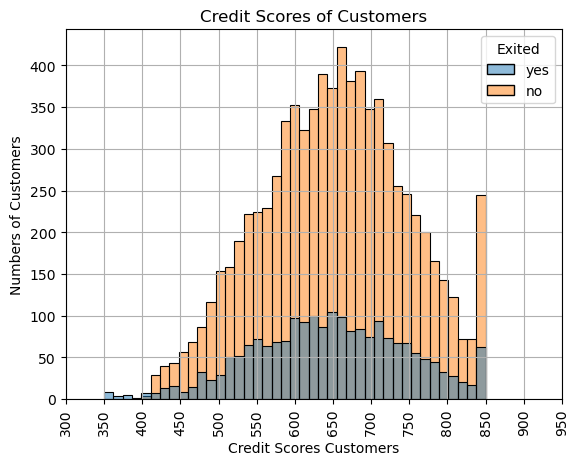

In [70]:
#Drawing histogram for the distribution of Bank Balance of the Customer who churn out to identify any possible pattern
sns.histplot(x='CreditScore', data= df, hue= "Exited", kde =False)#creating histogram
plt.xticks(np.arange(300,1000,50), rotation = 90)#setting x-axis
plt.xlabel("Credit Scores Customers")#labelling x-axis
plt.ylabel("Numbers of Customers")#labelling y-axis
plt.title("Credit Scores of Customers")#assingning title to the graph
plt.grid();#applying grisds to the graph

*Like Bank Balance Distribution, it also follows Normal Distribution which indicates that credit score have no role in customers behaviour who are churning out*

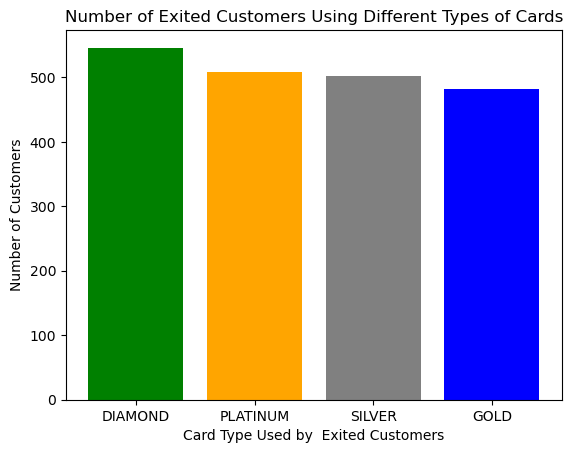

In [101]:
#creating a separate list for Age Group of customer that churned out 
g = []
for i, j in zip(df['Exited'], df['Card Type']):
    if i == 'yes':
        g.append(j)
g = pd.Series(g)

gm = g.value_counts()#counting frequencies of different values in the above created data frame

card_types = [str(card_type) for card_type in gm.index]#separating the different types/values from derived Series
plt.bar(card_types, gm.values, color=c)#to create a bar chart for different cards type using Matplotlib library
plt.xlabel("Card Type Used by  Exited Customers")#labelling x-axis
plt.ylabel("Number of Customers")#labelling y-axis
plt.title('Number of Exited Customers Using Different Types of Cards')#code to get dedicated title for graph
plt.show()#to finally get the graph 

*Diamond Card Users left the Bank most while Gold Card Users were the least to churn out. Diamond and Platium Card are two more rewarding card options but still the Users are churning out.*

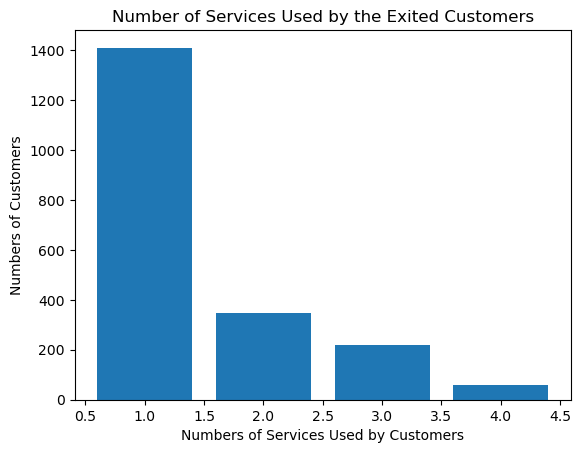

In [61]:
#creating a separate list for Age Group of customer that churned out
g= []
for i,j in zip(df['Exited'],df['NumOfProducts']):
    if i == 'yes':
       g.append(j)
        
g = pd.Series(g)

ns = g.value_counts()#counting frequencies of Number of Products by the customer who churned out in the above created data frame


plt.bar(ns.index,ns.values)#creating a barplot to represent the the number of product used by the customers who churned out
plt.xlabel("Numbers of Services Used by Customers")#labelling x-axis
plt.ylabel("Numbers of Customers")#labelling y-axis
plt.title('Number of Services Used by the Exited Customers');#assigning the title to the graph

*Most of the customer churn out , used a single product of the bank. Customers with multiple products are usually more invested in the bank, making them less likely to leave. The greater the number of products, the higher is the customer's commitment to the bank.* 

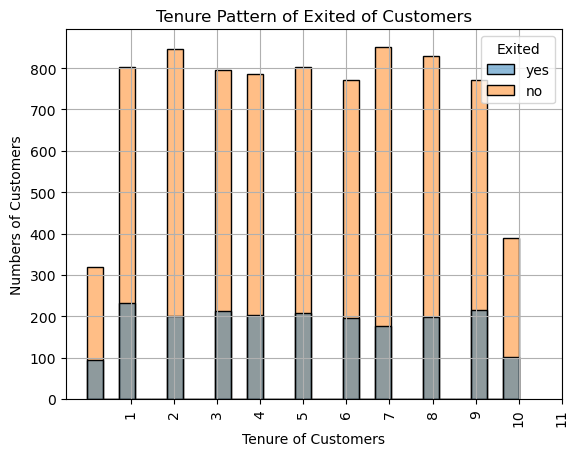

In [179]:
#plotting histogram for the tenure of churned out customers
sns.histplot(x='Tenure', data= df, hue= "Exited", kde =False)
plt.xticks(np.arange(1,12,1), rotation = 90)#setting x-axis
plt.xlabel("Tenure of Customers")#labelling x-axis
plt.ylabel("Numbers of Customers")#labelling y-axis
plt.title("Tenure Pattern of Exited of Customers")#setting title for the axis
plt.grid();#applying grid to the histogram

*Roughly equal number of customers are churning out from each tenure*